In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")
# in standard python

if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import data_processing as dp
import case_study_raw_query

In [ ]:
# pip install sklearn
connector = dp.establish_connection()

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [133]:
# Pull data from Snowflake using raw_query
query = case_study_raw_query.query()
df = dp.fetch_data(query, connector)

In [134]:
df.head()


,ACCNT_AGE_MTHS,SUBSCRIPTION_ACCOUNT_ID,EFFECTIVE_SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_ID,SFDC_ACCOUNT_NAME,REPORT_AS_OF_DT,REPORT_MONTH,BUYING_PROGRAM,LATEST_BUYING_PROGRAM,EFFECTIVE_ACR,IS_CONTRACT_FLAG,LATEST_EFFECTIVE_ACR,BCM,LATEST_BCM,INGEST_BCM,INGEST_UNIT_PRICE,CCU_BCM,CCU_UNIT_PRICE,USERS_BCM,USERS_UNIT_PRICE,SUBSCRIPTION_TERM_START_DATE,SUBSCRIPTION_TERM_END_DATE,RENEWAL_DATE,MULTIYEAR_FLAG,TOTAL_ACR,INDUSTRY,PHYSICAL_COUNTRY,SALES_HIER_GEO,SALES_HIER_REGION,SALES_HIER_SUB_REGION,EMPLOYEES,CHURN_INDICATOR,CONTRACT_START_DATE,MONTHS_SINCE_CONTRACT_START,DAILY_ENGAGED_USERS,DAU_R7D,COMMITTED_USERS,ROLLING_60_DAY_MEDIAN,DENOM_USERS,ADV_USED_FEATURES,TOTAL_ADV_FEATURES,DAU_ACTUALS,USED_FEATURES,TOTAL_FEATURES_3_PERCENT,DAU_R30D,TOTAL_FEATURES_R7D,USED_FEATURES_R7D,L3M_BCM,DAY_WISE_ACR,MONTH_WISE_ACR,AMOUNT_LEFT,CTD_CONSUMPTION_AMT_UPDATED,DAY_TEMPERATURE,MONTH_TEMPERATURE,DAYS_TO_DEPLETE,MONTHS_TO_DEPLETE,DAYS_UNTIL_RENEWAL,MONTHS_UNTIL_RENEWAL,FIRST_REPORT_DATE,RENEWAL_URGENCY_DAYS,OVERAGES,REVENUE_GROWTH_SCORE,CONTRACT_LENGTH_MTHS,CTD_CONSUMPTION_AMT,QTD_CONSUMPTION_AMT,YTD_CONSUMPTION_AMT,MTD_CONSUMPTION_EFF_AMT,MIN_COMMIT_AMT,M_PLUS_1_BCM,M_PLUS_3_BCM,M_PLUS_4_BCM,M_PLUS_5_BCM,M_PLUS_6_BCM,M_PLUS_10_BCM,M_PLUS_11_BCM,M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM,PCT_M_PLUS_1_BCM,PCT_M_PLUS_3_BCM,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,CONSUMED_MONTH_NUMBER,CONSUMED_MONTH_NUMBER_PER_SUBSCRIPTION,MTH_DIFF,MTHS_TILL_DATE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,METRIC_NAME,METRIC_VALUE,SCORE_TYPE,METRIC_SCORE,METRIC_NAME_SCORE,WEIGHTS,ADOPTION_SCORE_CAL,ENGAGEMENT_SCORE_CAL,FINANCIAL_HEALTH_SCORE_CAL,RISK_SCORE_CAL,SEGMENT_NAME
0,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2022-12-31,2022-12-01,Site License,Volume Plan,176280.000000000,1,135924.000000000,14690.000000000,11327.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,2022-04-28,2023-04-28,2023-04-28,0.0,176280.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2022-04-28,8.0,0E-9,0E-12,0E-9,0E-12,0E-12,NaN,NaN,0,0,NaN,0.000,None,0.000,None,482.958904109589,14690.000000000000,161590.000000000,14690.000000000,None,None,None,None,118,4,2023-04-28,None,None,50.00,12.00,None,14690.000000000,14690.000000000,14690.000000000,0E-9,14690.000000000,14690.000000000,14355.500000000,11694.000000000,12043.000000000,11345.000000000,11345.000000000,11345.000000000,12697.500000000000,11345.000000000000,0E-12,0E-12,-13.563648740640,-22.770592239619,1,1,8,30,None,RENEWAL_URGENCY_MONTHS,None,Financial_health_score,NaN,RENEWAL_URGENCY_MONTHS_HSCORE,0,0,0,69,100,Late Volume Plan
1,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2022-12-31,2022-12-01,Site License,Volume Plan,176280.000000000,1,135924.000000000,14690.000000000,11327.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,2022-04-28,2023-04-28,2023-04-28,0.0,176280.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2022-04-28,8.0,0E-9,0E-12,0E-9,0E-12,0E-12,NaN,NaN,0,0,NaN,0.000,None,0.000,None,482.958904109589,14690.000000000000,161590.000000000,14690.000000000,None,None,None,None,118,4,2023-04-28,None,None,50.00,12.00,None,14690.000000000,14690.000000000,14690.000000000,0E-9,14690.000000000,14690.000000000,14355.500000000,11694.000000000,12043.000000000,11345.000000000,11345.000000000,11345.000000000,12697.500000000000,11345.000000000000,0E-12,0E-12,-13.563648740640,-22.770592239619,1,1,8,30,None,PCT_P1P2_CASES,None,Risk_score,100.0,PCT_P1P2_CASES_HSCORE,0,0,0,69,100,Late Volume Plan
2,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2024-04-30,2024-04-01,Savings Plan,Volume Plan,136140.000000000,1,135924.000000000,11657.300000000,11327.000000000,5097.000000000,0.300000000,0E-9,0E-9,6560.300000000,398.000000000,2024-04-28,2025-04-28,2025-04-28,0.0,136140.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2024-04-28,0.0,20.00000

In [135]:
df.shape

(3002, 98)

In [136]:

unique_combinations = df[['SFDC_ACCOUNT_NAME', 'SEGMENT_NAME']].drop_duplicates()
unique_combinations

,SFDC_ACCOUNT_NAME,SEGMENT_NAME
0,State of Arizona - Arizona Health Care Cost Co...,Late Volume Plan
589,Highspot,Late Savings Plan
817,HHS/CMS/OEDA - (GDIT),Late Savings Plan
1406,"McCormick & Company, Incorporated",Late Savings Plan
1995,SirsiDynix,Late Savings Plan
2584,Drizly Inc,Late Savings Plan


In [137]:
score_cols = [
    "FINANCIAL_HEALTH_SCORE_CAL",
    "ADOPTION_SCORE_CAL",
    "ENGAGEMENT_SCORE_CAL",
    "RISK_SCORE_CAL"
]
df['OVERALL_HEALTH_SCORE'] = df[score_cols].mean(axis=1)

In [138]:
# df.head()
# df_filtered = df[df['REPORT_MONTH'] <= pd.to_datetime('2024-12-01')]
# df_filtered.head()
# Ensure REPORT_MONTH is datetime for filtering
df['REPORT_MONTH'] = pd.to_datetime(df['REPORT_MONTH'])
df = df[df['REPORT_MONTH'] < pd.to_datetime('2024-12-01')]
df.head()

,ACCNT_AGE_MTHS,SUBSCRIPTION_ACCOUNT_ID,EFFECTIVE_SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_ID,SFDC_ACCOUNT_NAME,REPORT_AS_OF_DT,REPORT_MONTH,BUYING_PROGRAM,LATEST_BUYING_PROGRAM,EFFECTIVE_ACR,IS_CONTRACT_FLAG,LATEST_EFFECTIVE_ACR,BCM,LATEST_BCM,INGEST_BCM,INGEST_UNIT_PRICE,CCU_BCM,CCU_UNIT_PRICE,USERS_BCM,USERS_UNIT_PRICE,SUBSCRIPTION_TERM_START_DATE,SUBSCRIPTION_TERM_END_DATE,RENEWAL_DATE,MULTIYEAR_FLAG,TOTAL_ACR,INDUSTRY,PHYSICAL_COUNTRY,SALES_HIER_GEO,SALES_HIER_REGION,SALES_HIER_SUB_REGION,EMPLOYEES,CHURN_INDICATOR,CONTRACT_START_DATE,MONTHS_SINCE_CONTRACT_START,DAILY_ENGAGED_USERS,DAU_R7D,COMMITTED_USERS,ROLLING_60_DAY_MEDIAN,DENOM_USERS,ADV_USED_FEATURES,TOTAL_ADV_FEATURES,DAU_ACTUALS,USED_FEATURES,TOTAL_FEATURES_3_PERCENT,DAU_R30D,TOTAL_FEATURES_R7D,USED_FEATURES_R7D,L3M_BCM,DAY_WISE_ACR,MONTH_WISE_ACR,AMOUNT_LEFT,CTD_CONSUMPTION_AMT_UPDATED,DAY_TEMPERATURE,MONTH_TEMPERATURE,DAYS_TO_DEPLETE,MONTHS_TO_DEPLETE,DAYS_UNTIL_RENEWAL,MONTHS_UNTIL_RENEWAL,FIRST_REPORT_DATE,RENEWAL_URGENCY_DAYS,OVERAGES,REVENUE_GROWTH_SCORE,CONTRACT_LENGTH_MTHS,CTD_CONSUMPTION_AMT,QTD_CONSUMPTION_AMT,YTD_CONSUMPTION_AMT,MTD_CONSUMPTION_EFF_AMT,MIN_COMMIT_AMT,M_PLUS_1_BCM,M_PLUS_3_BCM,M_PLUS_4_BCM,M_PLUS_5_BCM,M_PLUS_6_BCM,M_PLUS_10_BCM,M_PLUS_11_BCM,M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM,PCT_M_PLUS_1_BCM,PCT_M_PLUS_3_BCM,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,CONSUMED_MONTH_NUMBER,CONSUMED_MONTH_NUMBER_PER_SUBSCRIPTION,MTH_DIFF,MTHS_TILL_DATE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,METRIC_NAME,METRIC_VALUE,SCORE_TYPE,METRIC_SCORE,METRIC_NAME_SCORE,WEIGHTS,ADOPTION_SCORE_CAL,ENGAGEMENT_SCORE_CAL,FINANCIAL_HEALTH_SCORE_CAL,RISK_SCORE_CAL,SEGMENT_NAME,OVERALL_HEALTH_SCORE
0,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2022-12-31,2022-12-01,Site License,Volume Plan,176280.000000000,1,135924.000000000,14690.000000000,11327.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,2022-04-28,2023-04-28,2023-04-28,0.0,176280.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2022-04-28,8.0,0E-9,0E-12,0E-9,0E-12,0E-12,NaN,NaN,0,0,NaN,0.000,None,0.000,None,482.958904109589,14690.000000000000,161590.000000000,14690.000000000,None,None,None,None,118,4,2023-04-28,None,None,50.00,12.00,None,14690.000000000,14690.000000000,14690.000000000,0E-9,14690.000000000,14690.000000000,14355.500000000,11694.000000000,12043.000000000,11345.000000000,11345.000000000,11345.000000000,12697.500000000000,11345.000000000000,0E-12,0E-12,-13.563648740640,-22.770592239619,1,1,8,30,None,RENEWAL_URGENCY_MONTHS,None,Financial_health_score,NaN,RENEWAL_URGENCY_MONTHS_HSCORE,0,0,0,69,100,Late Volume Plan,42.25
1,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2022-12-31,2022-12-01,Site License,Volume Plan,176280.000000000,1,135924.000000000,14690.000000000,11327.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,2022-04-28,2023-04-28,2023-04-28,0.0,176280.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2022-04-28,8.0,0E-9,0E-12,0E-9,0E-12,0E-12,NaN,NaN,0,0,NaN,0.000,None,0.000,None,482.958904109589,14690.000000000000,161590.000000000,14690.000000000,None,None,None,None,118,4,2023-04-28,None,None,50.00,12.00,None,14690.000000000,14690.000000000,14690.000000000,0E-9,14690.000000000,14690.000000000,14355.500000000,11694.000000000,12043.000000000,11345.000000000,11345.000000000,11345.000000000,12697.500000000000,11345.000000000000,0E-12,0E-12,-13.563648740640,-22.770592239619,1,1,8,30,None,PCT_P1P2_CASES,None,Risk_score,100.0,PCT_P1P2_CASES_HSCORE,0,0,0,69,100,Late Volume Plan,42.25
2,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2024-04-30,2024-04-01,Savings Plan,Volume Plan,136140.000000000,1,135924.000000000,11657.300000000,11327.000000000,5097.000000000,0.300000000,0E-9,0E-9,6560.300000000,398.000000000,2024-04-28,2025-04-28,2025-04-28,0.0,136140.000000000,Government,United States,AMER,Enterprise,Public Sector,501.00

In [139]:
df

,ACCNT_AGE_MTHS,SUBSCRIPTION_ACCOUNT_ID,EFFECTIVE_SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_ID,SFDC_ACCOUNT_NAME,REPORT_AS_OF_DT,REPORT_MONTH,BUYING_PROGRAM,LATEST_BUYING_PROGRAM,EFFECTIVE_ACR,IS_CONTRACT_FLAG,LATEST_EFFECTIVE_ACR,BCM,LATEST_BCM,INGEST_BCM,INGEST_UNIT_PRICE,CCU_BCM,CCU_UNIT_PRICE,USERS_BCM,USERS_UNIT_PRICE,SUBSCRIPTION_TERM_START_DATE,SUBSCRIPTION_TERM_END_DATE,RENEWAL_DATE,MULTIYEAR_FLAG,TOTAL_ACR,INDUSTRY,PHYSICAL_COUNTRY,SALES_HIER_GEO,SALES_HIER_REGION,SALES_HIER_SUB_REGION,EMPLOYEES,CHURN_INDICATOR,CONTRACT_START_DATE,MONTHS_SINCE_CONTRACT_START,DAILY_ENGAGED_USERS,DAU_R7D,COMMITTED_USERS,ROLLING_60_DAY_MEDIAN,DENOM_USERS,ADV_USED_FEATURES,TOTAL_ADV_FEATURES,DAU_ACTUALS,USED_FEATURES,TOTAL_FEATURES_3_PERCENT,DAU_R30D,TOTAL_FEATURES_R7D,USED_FEATURES_R7D,L3M_BCM,DAY_WISE_ACR,MONTH_WISE_ACR,AMOUNT_LEFT,CTD_CONSUMPTION_AMT_UPDATED,DAY_TEMPERATURE,MONTH_TEMPERATURE,DAYS_TO_DEPLETE,MONTHS_TO_DEPLETE,DAYS_UNTIL_RENEWAL,MONTHS_UNTIL_RENEWAL,FIRST_REPORT_DATE,RENEWAL_URGENCY_DAYS,OVERAGES,REVENUE_GROWTH_SCORE,CONTRACT_LENGTH_MTHS,CTD_CONSUMPTION_AMT,QTD_CONSUMPTION_AMT,YTD_CONSUMPTION_AMT,MTD_CONSUMPTION_EFF_AMT,MIN_COMMIT_AMT,M_PLUS_1_BCM,M_PLUS_3_BCM,M_PLUS_4_BCM,M_PLUS_5_BCM,M_PLUS_6_BCM,M_PLUS_10_BCM,M_PLUS_11_BCM,M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM,PCT_M_PLUS_1_BCM,PCT_M_PLUS_3_BCM,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,CONSUMED_MONTH_NUMBER,CONSUMED_MONTH_NUMBER_PER_SUBSCRIPTION,MTH_DIFF,MTHS_TILL_DATE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,METRIC_NAME,METRIC_VALUE,SCORE_TYPE,METRIC_SCORE,METRIC_NAME_SCORE,WEIGHTS,ADOPTION_SCORE_CAL,ENGAGEMENT_SCORE_CAL,FINANCIAL_HEALTH_SCORE_CAL,RISK_SCORE_CAL,SEGMENT_NAME,OVERALL_HEALTH_SCORE
0,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2022-12-31,2022-12-01,Site License,Volume Plan,176280.000000000,1,135924.000000000,14690.000000000,11327.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,2022-04-28,2023-04-28,2023-04-28,0.0,176280.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2022-04-28,8.0,0E-9,0E-12,0E-9,0E-12,0E-12,NaN,NaN,0,0,NaN,0.000,None,0.000,None,482.958904109589,14690.000000000000,161590.000000000,14690.000000000,None,None,None,None,118,4,2023-04-28,None,None,50.00,12.00,None,14690.000000000,14690.000000000,14690.000000000,0E-9,14690.000000000,14690.000000000,14355.500000000,11694.000000000,12043.000000000,11345.000000000,11345.000000000,11345.000000000,12697.500000000000,11345.000000000000,0E-12,0E-12,-13.563648740640,-22.770592239619,1,1,8,30,None,RENEWAL_URGENCY_MONTHS,None,Financial_health_score,NaN,RENEWAL_URGENCY_MONTHS_HSCORE,0,0,0,69,100,Late Volume Plan,42.25
1,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2022-12-31,2022-12-01,Site License,Volume Plan,176280.000000000,1,135924.000000000,14690.000000000,11327.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,2022-04-28,2023-04-28,2023-04-28,0.0,176280.000000000,Government,United States,AMER,Enterprise,Public Sector,501.000000000,N,2022-04-28,8.0,0E-9,0E-12,0E-9,0E-12,0E-12,NaN,NaN,0,0,NaN,0.000,None,0.000,None,482.958904109589,14690.000000000000,161590.000000000,14690.000000000,None,None,None,None,118,4,2023-04-28,None,None,50.00,12.00,None,14690.000000000,14690.000000000,14690.000000000,0E-9,14690.000000000,14690.000000000,14355.500000000,11694.000000000,12043.000000000,11345.000000000,11345.000000000,11345.000000000,12697.500000000000,11345.000000000000,0E-12,0E-12,-13.563648740640,-22.770592239619,1,1,8,30,None,PCT_P1P2_CASES,None,Risk_score,100.0,PCT_P1P2_CASES_HSCORE,0,0,0,69,100,Late Volume Plan,42.25
2,38,3124988,3124988,0011U00001S8b13QAB,State of Arizona - Arizona Health Care Cost Co...,2024-04-30,2024-04-01,Savings Plan,Volume Plan,136140.000000000,1,135924.000000000,11657.300000000,11327.000000000,5097.000000000,0.300000000,0E-9,0E-9,6560.300000000,398.000000000,2024-04-28,2025-04-28,2025-04-28,0.0,136140.000000000,Government,United States,AMER,Enterprise,Public Sector,501.00

# Dual Y-Axis Chart with Stacked Scores, Scaled ACR, and PCT_M_PLUS_6_BCM
Plot for each account showing:
- Stacked bar chart of monthly average scores
- Effective ACR as dotted line (scaled to 0-100)
- PCT_M_PLUS_6_BCM as line on right y-axis

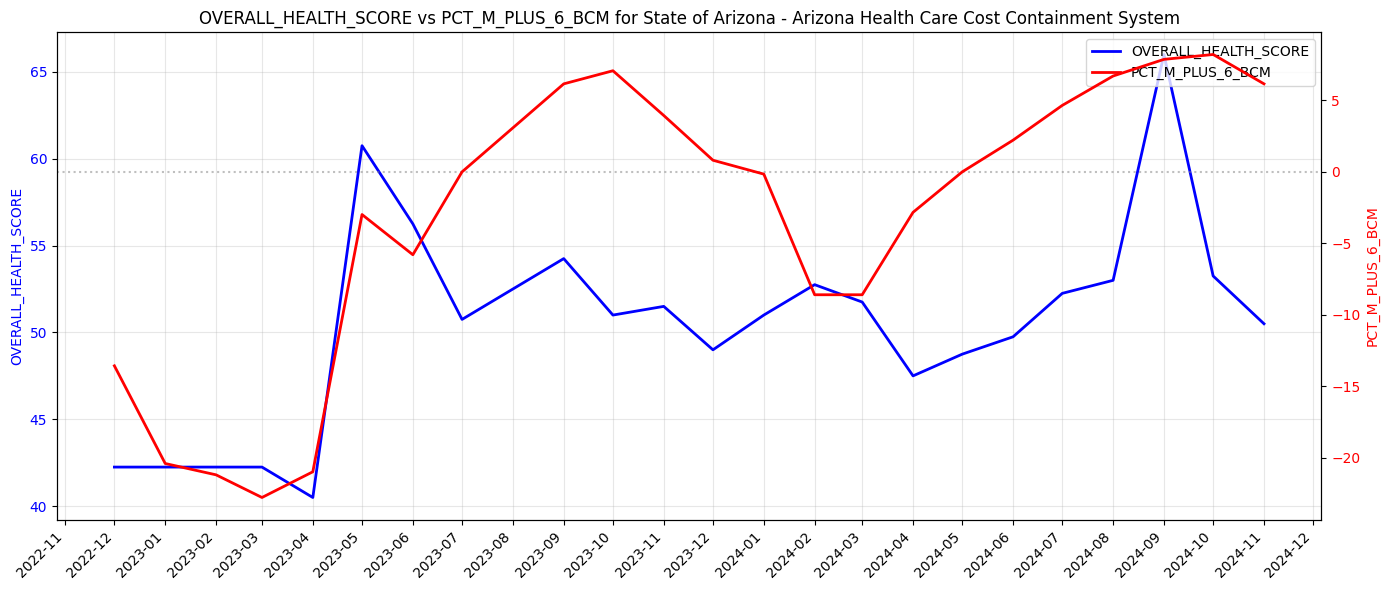

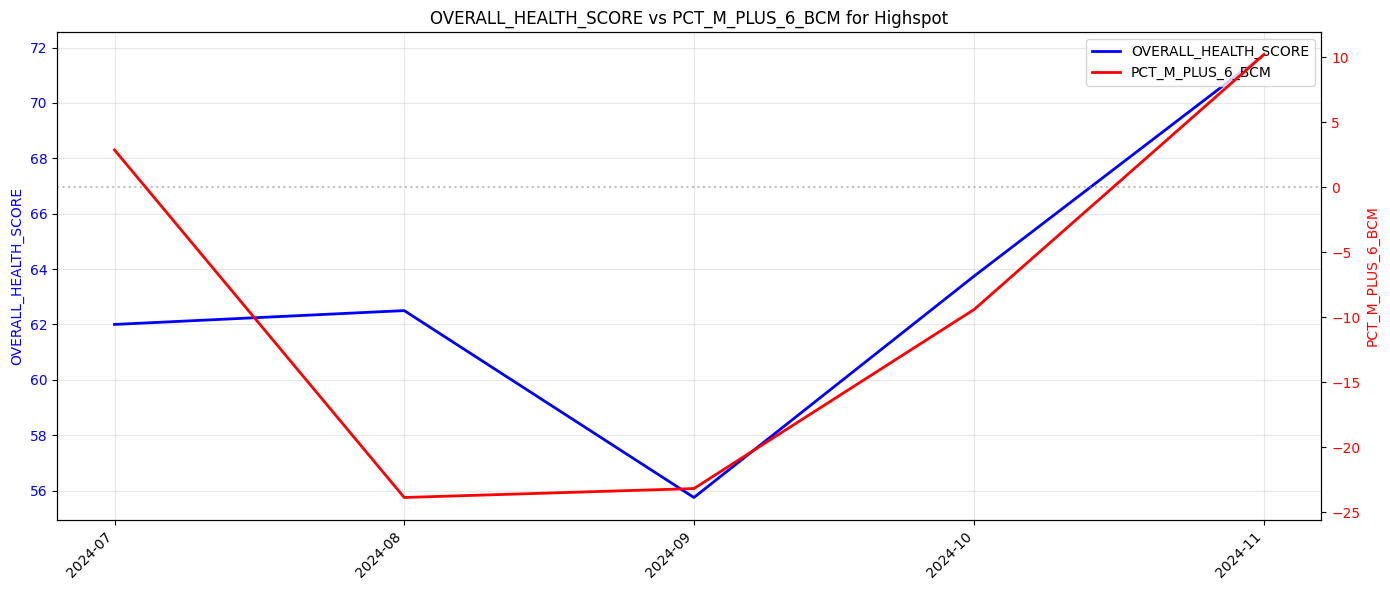

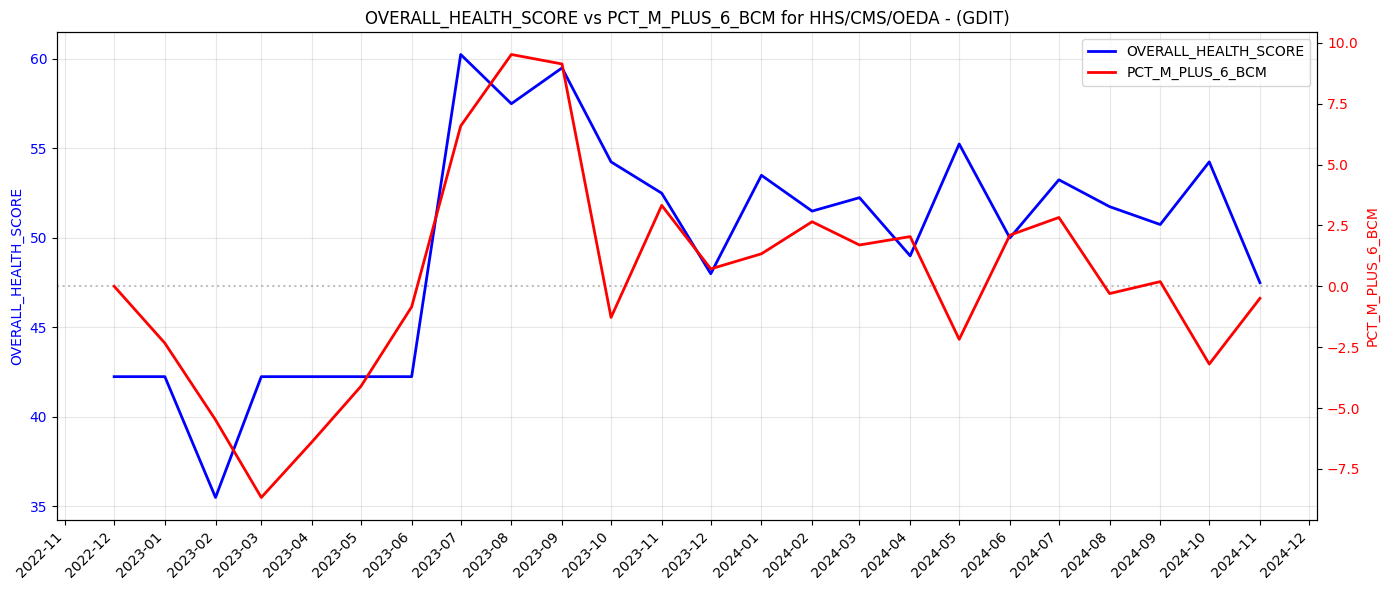

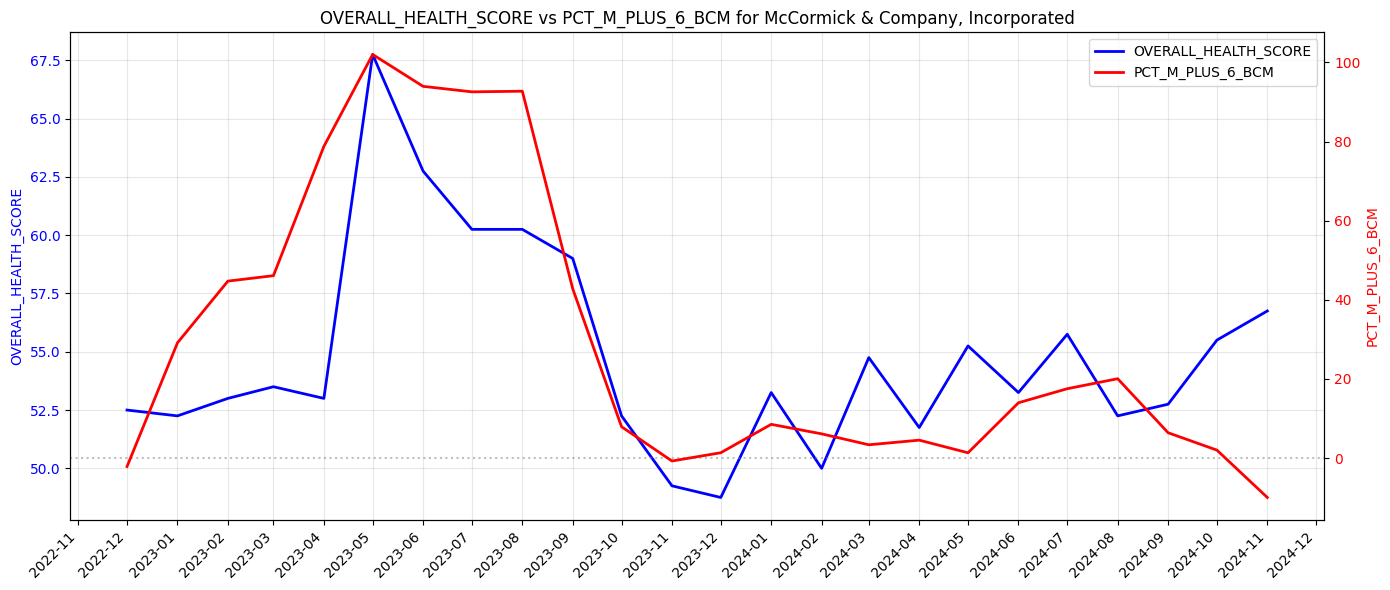

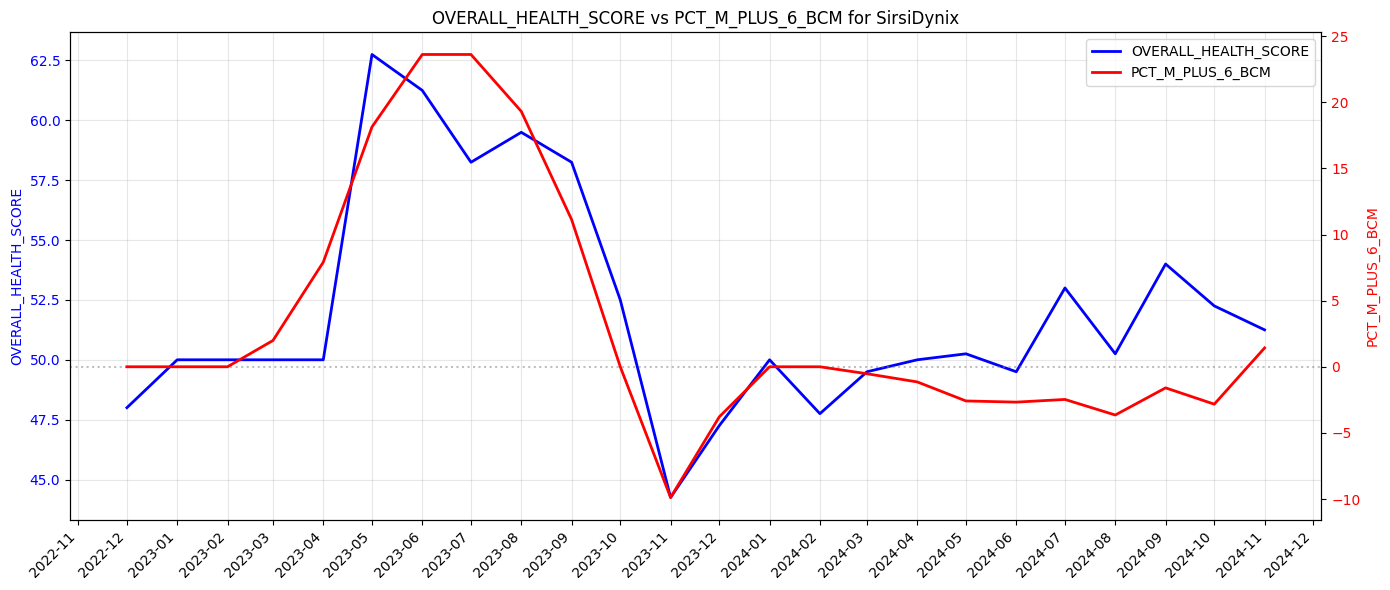

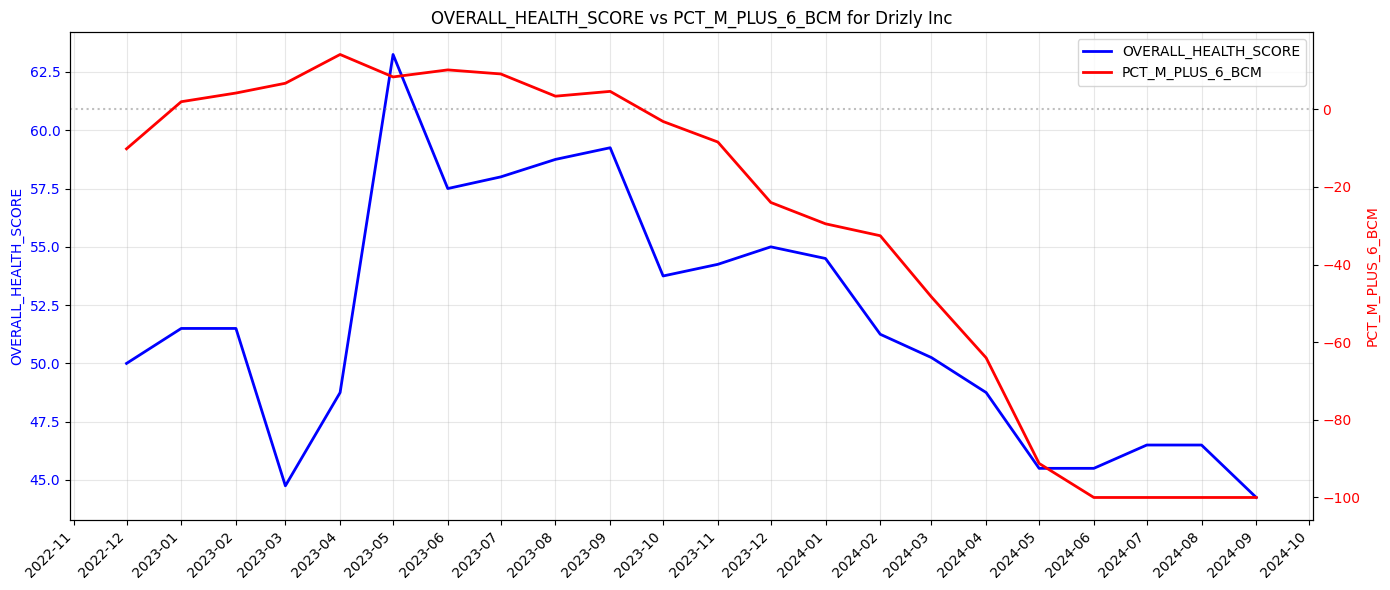

In [141]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for account in df['SFDC_ACCOUNT_NAME'].unique():
    # Filter and prepare data
    acc_df = df[df['SFDC_ACCOUNT_NAME'] == account].copy()
    acc_df['REPORT_MONTH'] = pd.to_datetime(acc_df['REPORT_MONTH'])
    
    # Group by month and calculate means
    monthly_means = acc_df.groupby('REPORT_MONTH').agg({
        'OVERALL_HEALTH_SCORE': 'mean',
        'PCT_M_PLUS_6_BCM': lambda x: pd.to_numeric(x, errors='coerce').mean()
    }).reset_index()

    # Create figure
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax2 = ax1.twinx()

    # Plot OVERALL_HEALTH_SCORE
    line1 = ax1.plot(monthly_means['REPORT_MONTH'], monthly_means['OVERALL_HEALTH_SCORE'], 
             'b-', linewidth=2, label='OVERALL_HEALTH_SCORE')
    ax1.set_ylabel('OVERALL_HEALTH_SCORE', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Add reference line at y=0 for PCT_M_PLUS_6_BCM
    ax2.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

    # Plot PCT_M_PLUS_6_BCM
    line2 = ax2.plot(monthly_means['REPORT_MONTH'], monthly_means['PCT_M_PLUS_6_BCM'], 
             'r-', linewidth=2, label='PCT_M_PLUS_6_BCM')
    ax2.set_ylabel('PCT_M_PLUS_6_BCM', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Format x-axis
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.grid(True, alpha=0.3)

    # Title
    plt.title(f"OVERALL_HEALTH_SCORE vs PCT_M_PLUS_6_BCM for {account}")
    
    # Combine legends from both axes
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_2576/962452204.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


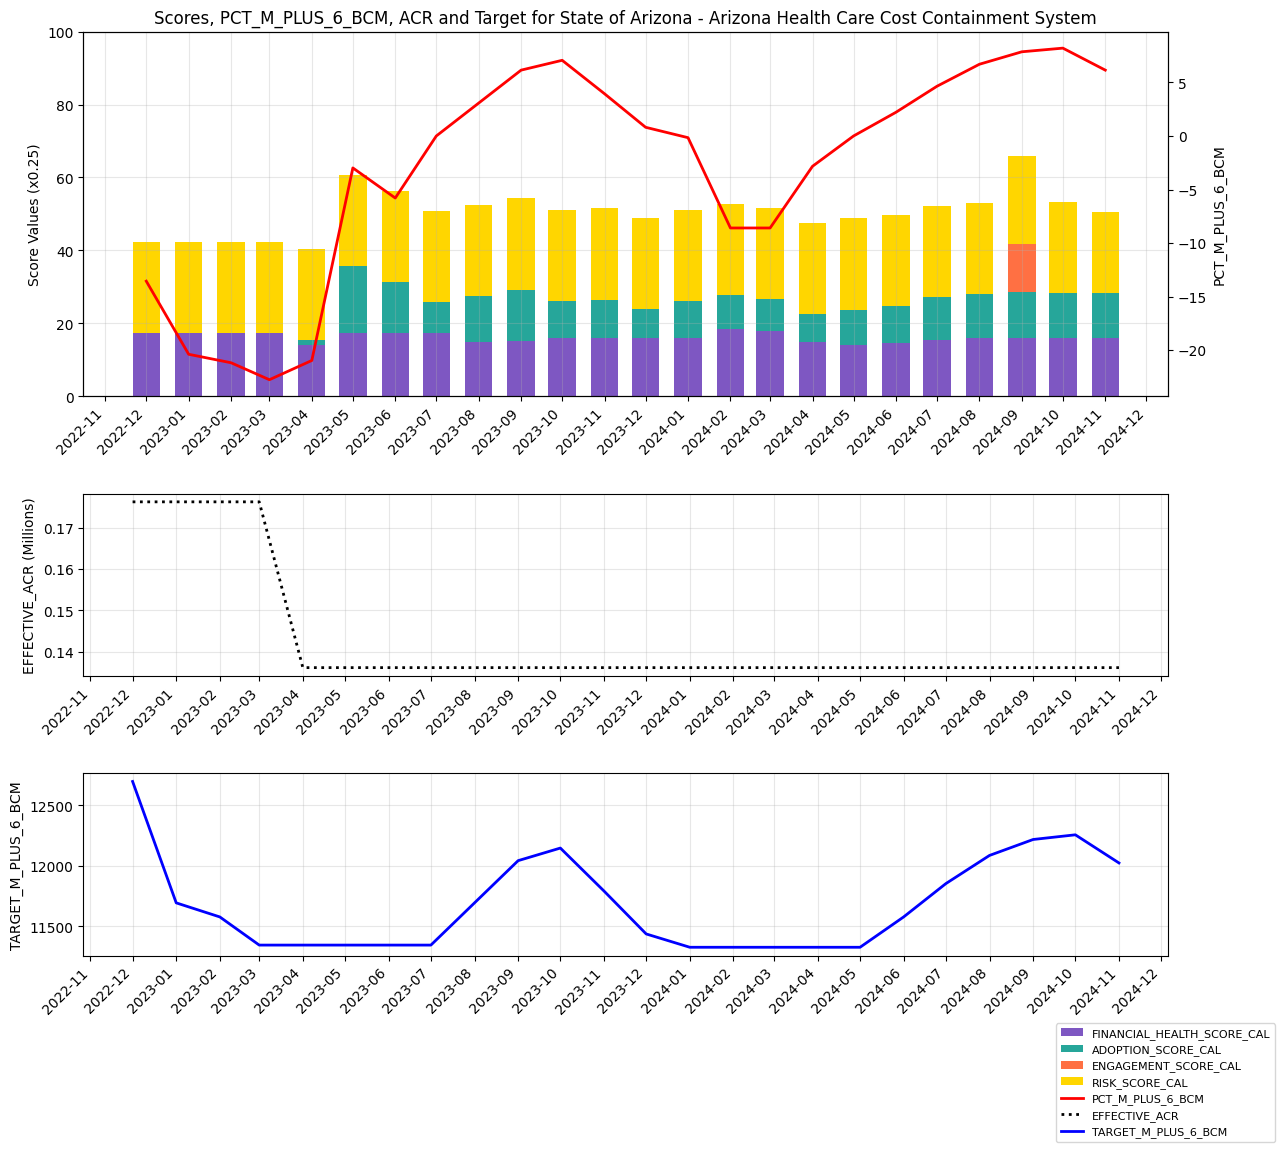

/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_2576/962452204.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


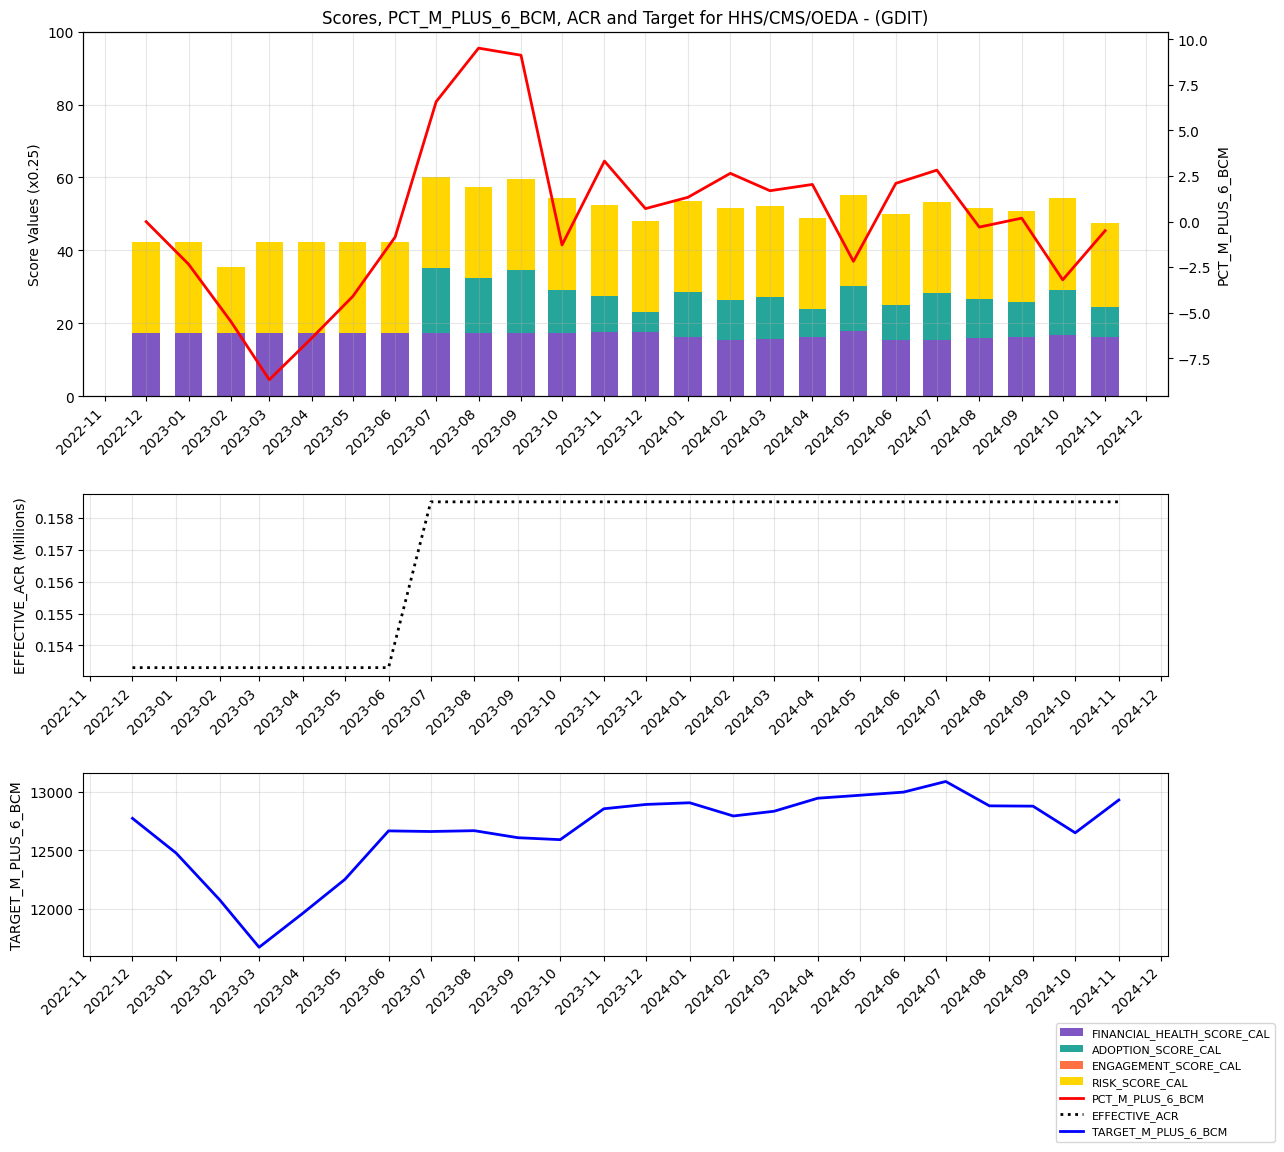

/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_2576/962452204.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


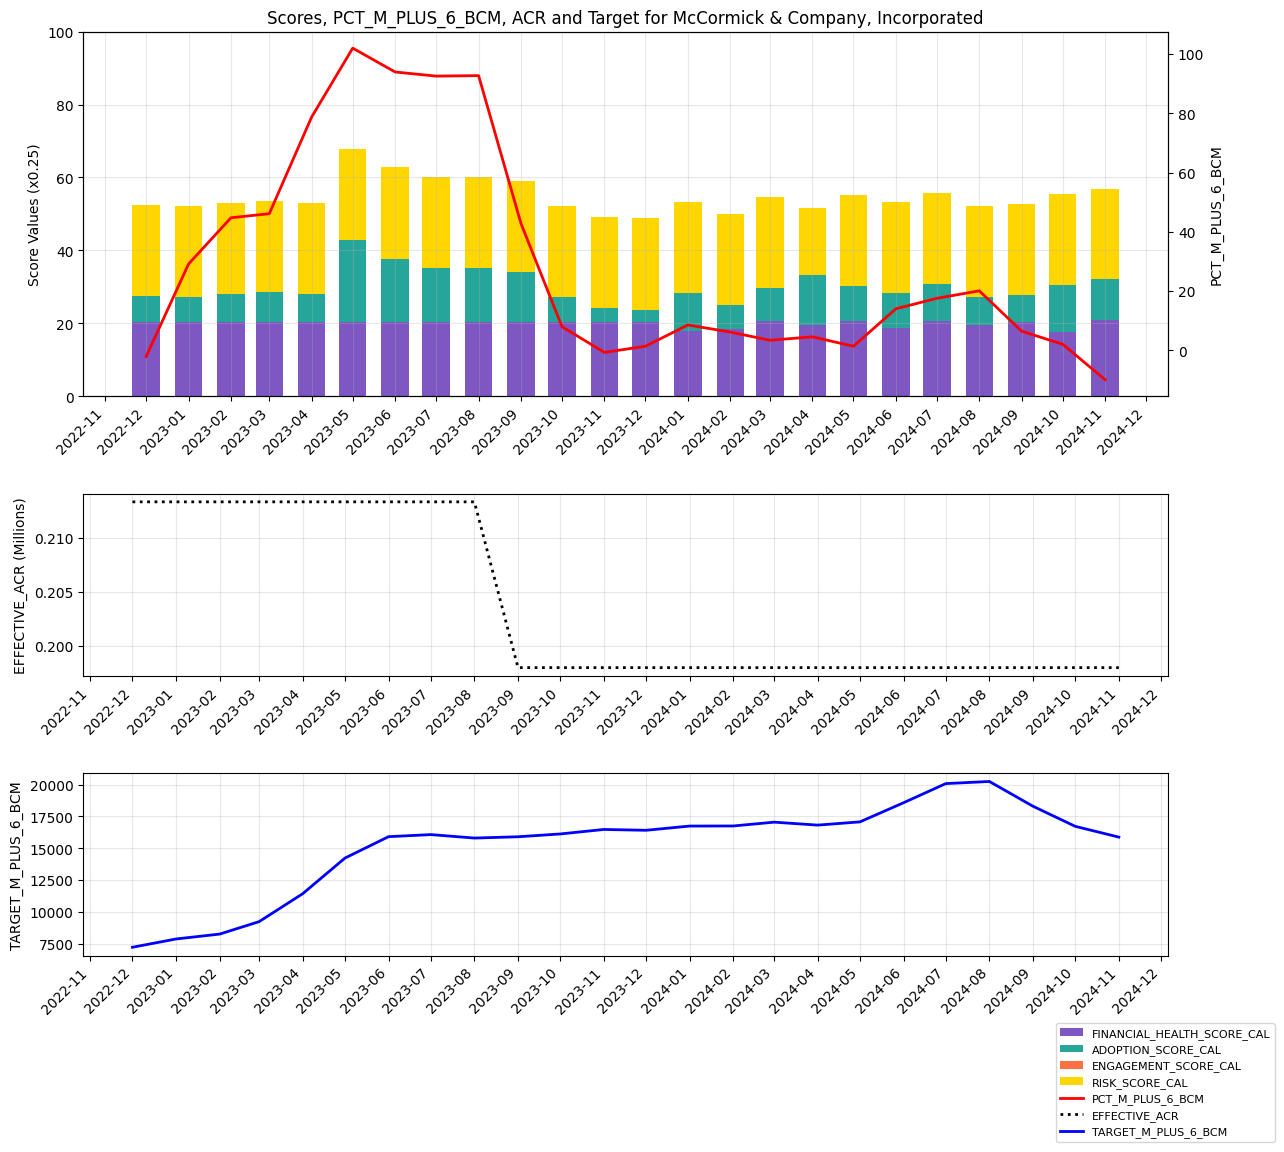

/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_2576/962452204.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


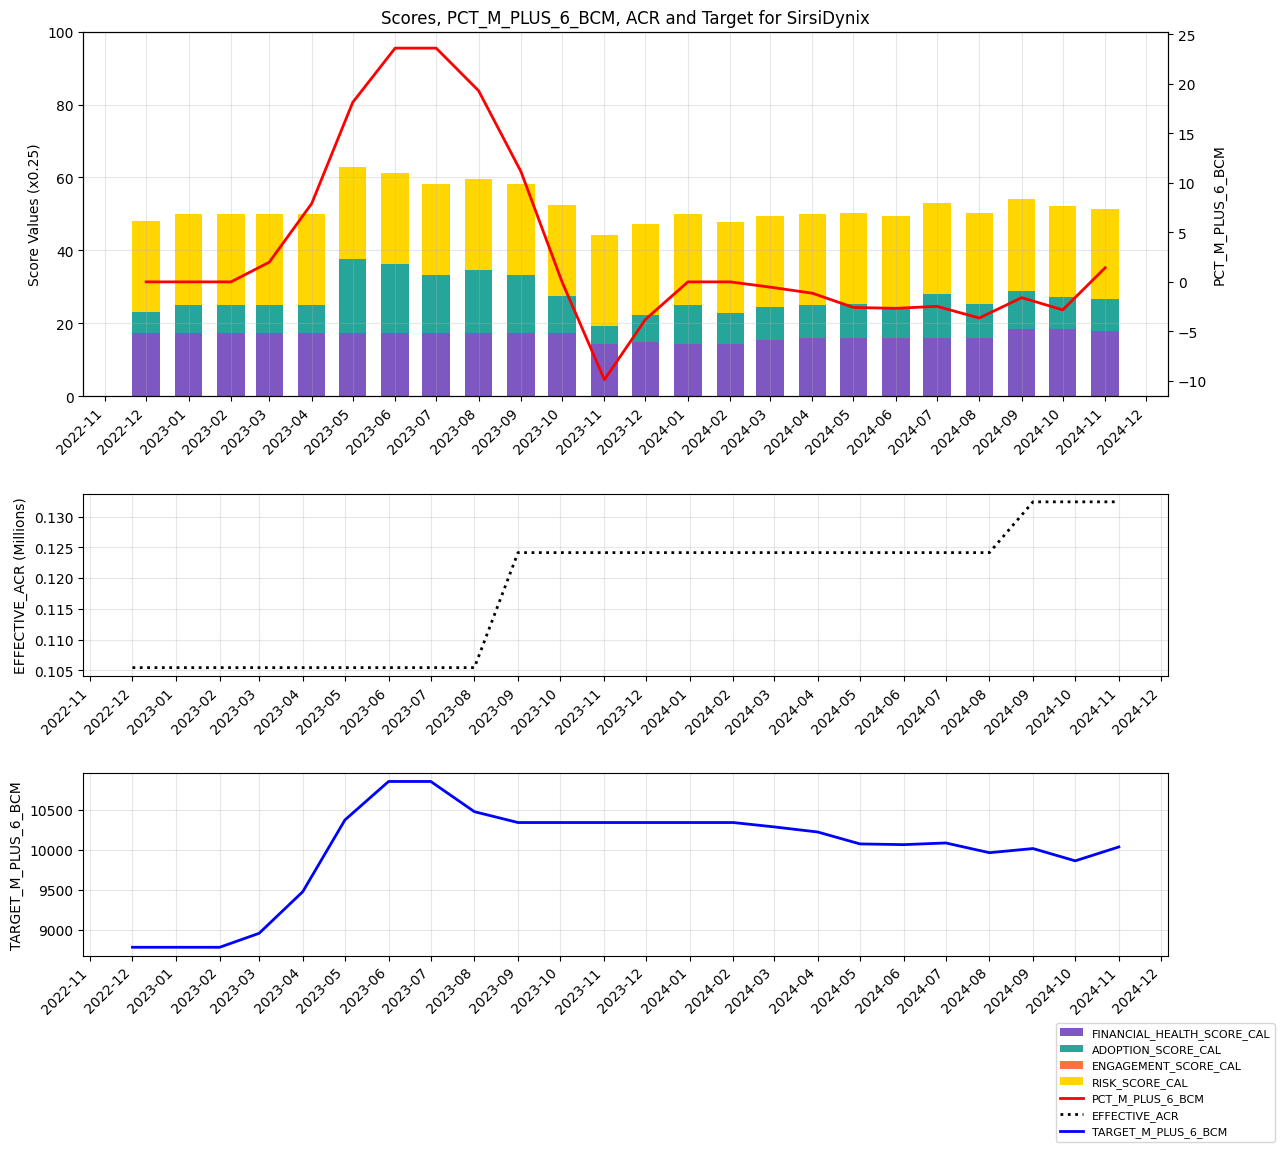

/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_2576/962452204.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


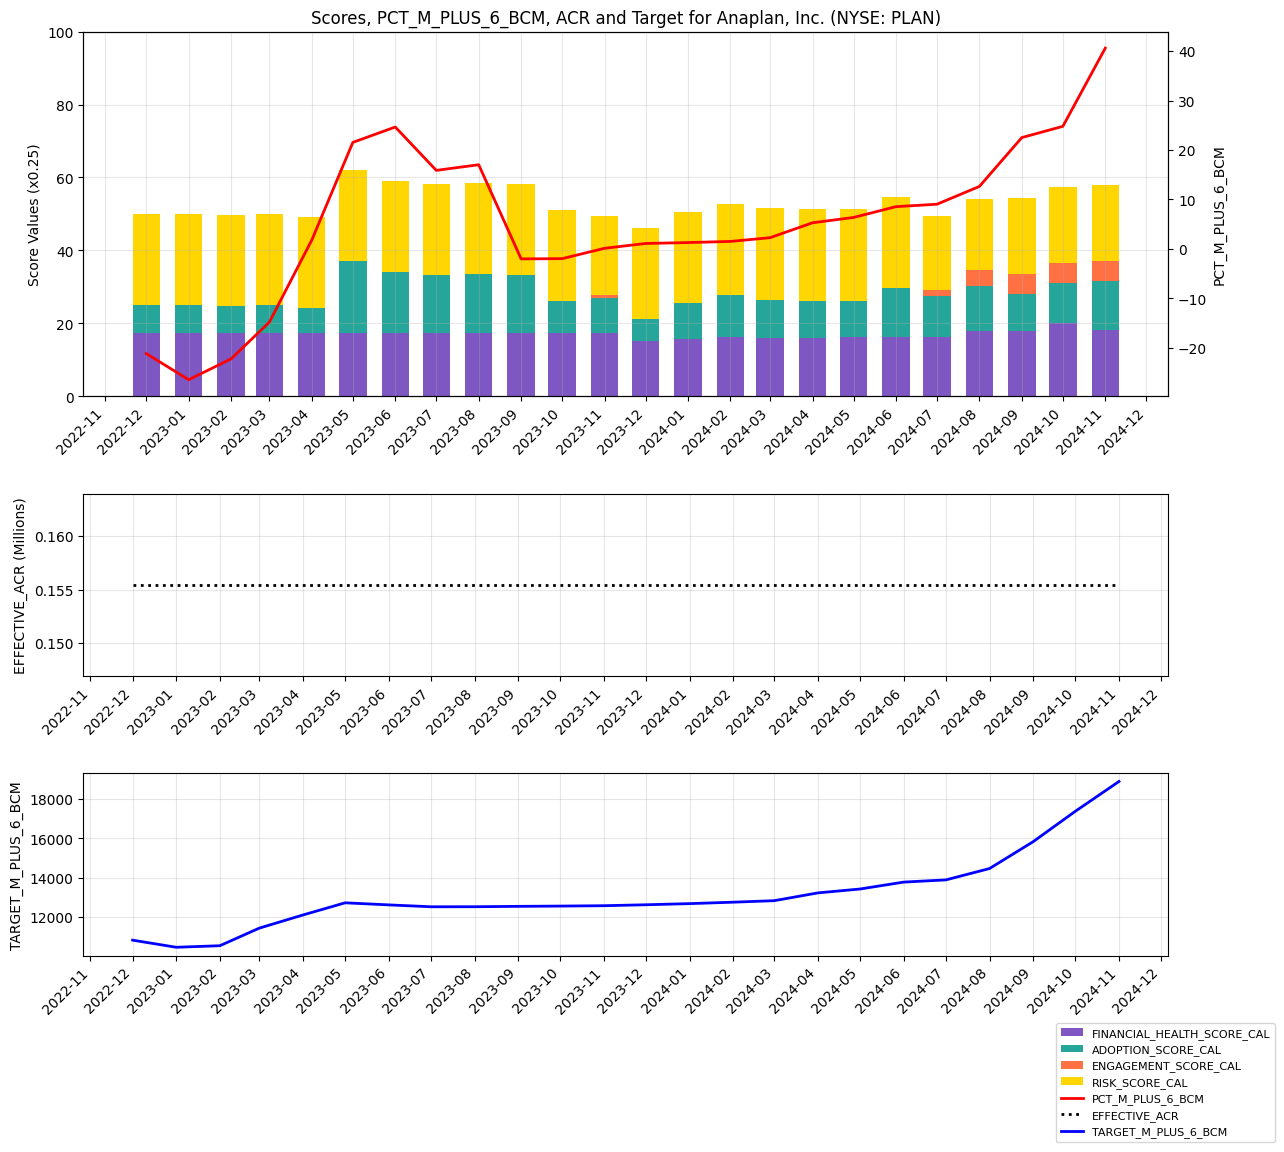

/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_2576/962452204.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


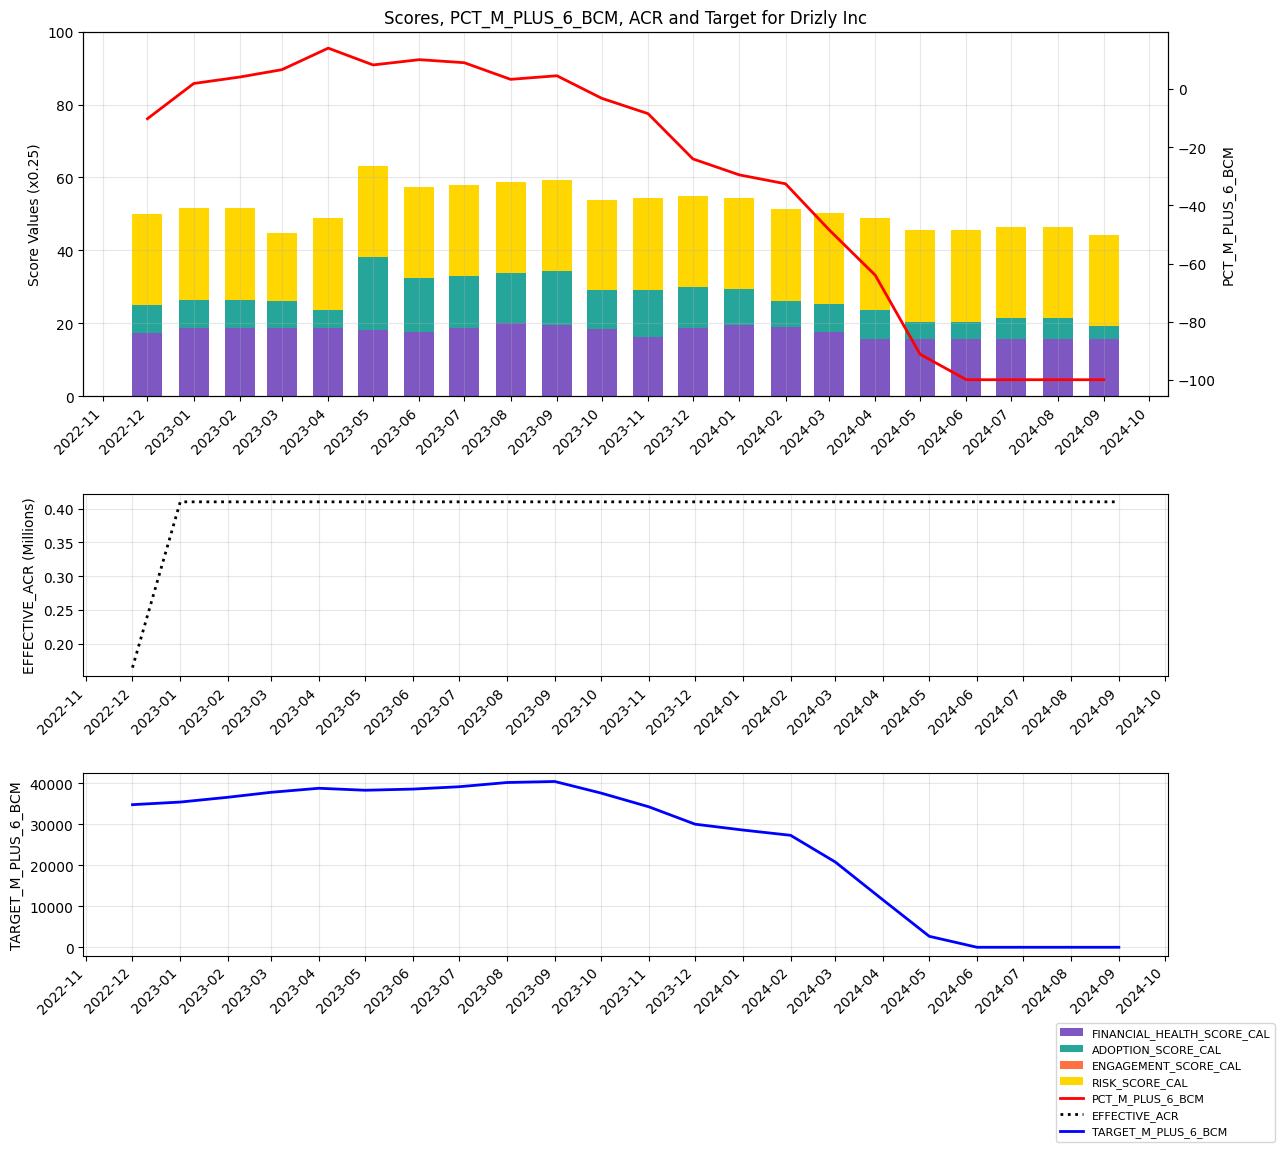

In [132]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

score_cols = [
    "FINANCIAL_HEALTH_SCORE_CAL",
    "ADOPTION_SCORE_CAL",
    "ENGAGEMENT_SCORE_CAL",
    "RISK_SCORE_CAL"
]
bar_colors = ['#7E57C2', '#26A69A', '#FF7043', '#FFD600']

for account in df['SFDC_ACCOUNT_NAME'].unique():
    # Filter and prepare data
    acc_df = df[df['SFDC_ACCOUNT_NAME'] == account].copy()
    acc_df['REPORT_MONTH'] = pd.to_datetime(acc_df['REPORT_MONTH'])
    
    # Group by month and calculate means
    monthly_means = acc_df.groupby('REPORT_MONTH').agg({
        **{col: 'mean' for col in score_cols},
        'EFFECTIVE_ACR': lambda x: pd.to_numeric(x, errors='coerce').mean(),
        'PCT_M_PLUS_6_BCM': lambda x: pd.to_numeric(x, errors='coerce').mean(),
        'TARGET_M_PLUS_6_BCM': lambda x: pd.to_numeric(x, errors='coerce').mean()
    }).reset_index()

    # Create figure with GridSpec - increased spacing between subplots
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 1, height_ratios=[2, 1, 1], hspace=0.4)

    # Top subplot for stacked bars and PCT_M_PLUS_6_BCM
    ax1 = fig.add_subplot(gs[0])
    ax2 = ax1.twinx()  # Second y-axis for PCT values

    # Stack bars
    bottom = np.zeros(len(monthly_means))
    for idx, col in enumerate(score_cols):
        ax1.bar(monthly_means['REPORT_MONTH'], monthly_means[col]*0.25, 
                bottom=bottom, label=col, width=20, color=bar_colors[idx])
        bottom += monthly_means[col].values*0.25

    # Line plot for PCT_M_PLUS_6_BCM
    ax2.plot(monthly_means['REPORT_MONTH'], monthly_means['PCT_M_PLUS_6_BCM'], 
             'r-', label='PCT_M_PLUS_6_BCM', linewidth=2)

    ax1.set_ylabel("Score Values (x0.25)", color='black')
    ax2.set_ylabel("PCT_M_PLUS_6_BCM", color='black')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Format date on x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Middle subplot for EFFECTIVE_ACR
    ax3 = fig.add_subplot(gs[1])
    acr_values = monthly_means['EFFECTIVE_ACR'].values / 1e6  # Convert to millions
    ax3.plot(monthly_means['REPORT_MONTH'], acr_values, 'k:', 
             linewidth=2, label='EFFECTIVE_ACR')
    ax3.set_ylabel("EFFECTIVE_ACR (Millions)", color='black')
    ax3.grid(True, alpha=0.3)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax3.xaxis.set_major_locator(mdates.MonthLocator())
    plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

    # Bottom subplot for TARGET_M_PLUS_6_BCM
    ax4 = fig.add_subplot(gs[2])
    ax4.plot(monthly_means['REPORT_MONTH'], monthly_means['TARGET_M_PLUS_6_BCM'], 
             'b-', linewidth=2, label='TARGET_M_PLUS_6_BCM')
    ax4.set_ylabel("TARGET_M_PLUS_6_BCM", color='black')
    ax4.grid(True, alpha=0.3)
    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax4.xaxis.set_major_locator(mdates.MonthLocator())
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

    # Title and legends
    ax1.set_title(f"Scores, PCT_M_PLUS_6_BCM, ACR and Target for {account}")
    
    # Add legends
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles3, labels3 = ax3.get_legend_handles_labels()
    handles4, labels4 = ax4.get_legend_handles_labels()
    
    # Combined legend for all plots
    fig.legend(handles1 + handles2 + handles3 + handles4, 
              labels1 + labels2 + labels3 + labels4,
              fontsize=8, loc='lower right', 
              bbox_to_anchor=(0.98, -0.05))

    plt.tight_layout()
    plt.show()

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for account in df['SFDC_ACCOUNT_NAME'].unique():
    # Filter and prepare data
    acc_df = df[df['SFDC_ACCOUNT_NAME'] == account].copy()
    acc_df['REPORT_MONTH'] = pd.to_datetime(acc_df['REPORT_MONTH'])
    
    # Group by month and calculate means
    monthly_means = acc_df.groupby('REPORT_MONTH').agg({
        'OVERALL_HEALTH_SCORE': 'mean',
        'TARGET_M_PLUS_6_BCM': lambda x: pd.to_numeric(x, errors='coerce').mean()
    }).reset_index()

    # Create figure
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax2 = ax1.twinx()

    # Plot OVERALL_HEALTH_SCORE
    line1 = ax1.plot(monthly_means['REPORT_MONTH'], monthly_means['OVERALL_HEALTH_SCORE'], 
             'b-', linewidth=2, label='OVERALL_HEALTH_SCORE')
    ax1.set_ylabel('OVERALL_HEALTH_SCORE', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Add reference line at y=0 for TARGET_M_PLUS_6_BCM
    ax2.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

    # Plot TARGET_M_PLUS_6_BCM
    line2 = ax2.plot(monthly_means['REPORT_MONTH'], monthly_means['TARGET_M_PLUS_6_BCM'], 
             'r-', linewidth=2, label='PCT_M_PLUS_6_BCM')
    ax2.set_ylabel('TARGET_M_PLUS_6_BCM', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Format x-axis
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.grid(True, alpha=0.3)

    # Title
    plt.title(f"OVERALL_HEALTH_SCORE vs TARGET_M_PLUS_6_BCM for {account}")
    
    # Combine legends from both axes
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

KeyError: "Column(s) ['OVERALL_HEALTH_SCORE'] do not exist"

(589, 99)